In [1]:
import sys
# Add the src directory to the Python path
sys.path.insert(0, '../src')

In [2]:
from datetime import datetime

from botcoin.profilers.stock import StockProfiler
from botcoin.utils.stream_data import generate_price_stream
from botcoin.utils.visual.statistics import plot_kde_with_stats, plot_price_histogram_with_stats

In [3]:
symbol = "BRK-B"
profiler = StockProfiler()

In [4]:
profile = profiler.profile(symbol)

2025-06-09 23:50:46,443 - YfDataProvider - WARNING: The date range does not contain any market open times.
2025-06-09 23:50:46,447 - DataManager - INFO: Data saved to data\BRK-B_ohlcv_1d.parquet


In [5]:
returns_1min = profile["1min_returns"]
print(f"Profile for {symbol}:")
print(f"Number of 1-minute returns for {symbol}: {len(returns_1min)}")
print(f"Mean 1-minute returns for {symbol}: {returns_1min.mean():.6f}")
print(f"Standard deviation of 1-minute returns for {symbol}: {returns_1min.std():.6f}")
print(f"Max 1-minute return for {symbol}: {returns_1min.max():.6f}")
print(f"Min 1-minute return for {symbol}: {returns_1min.min():.6f}")

Profile for BRK-B:
Number of 1-minute returns for BRK-B: 7729
Mean 1-minute returns for BRK-B: -0.000008
Standard deviation of 1-minute returns for BRK-B: 0.000384
Max 1-minute return for BRK-B: 0.002530
Min 1-minute return for BRK-B: -0.006088


In [6]:
returns_1d = profile["1d_returns"]
print(f"Number of 1-day returns for {symbol}: {len(returns_1d)}")
print(f"Mean 1-day returns for {symbol}: {returns_1d.mean():.6f}")
print(f"Standard deviation of 1-day returns for {symbol}: {returns_1d.std():.6f}")
print(f"Max 1-day return for {symbol}: {returns_1d.max():.6f}")
print(f"Min 1-day return for {symbol}: {returns_1d.min():.6f}")

Number of 1-day returns for BRK-B: 1255
Mean 1-day returns for BRK-B: -0.000115
Standard deviation of 1-day returns for BRK-B: 0.009897
Max 1-day return for BRK-B: 0.064102
Min 1-day return for BRK-B: -0.049056


In [7]:
# Compute percentage of data within ±1 std
data = returns_1d
mean = data.mean()
std = data.std()
lower_bound = mean - std
upper_bound = mean + std
within_std = data[(data >= lower_bound) & (data <= upper_bound)]
percentage_within_std = len(within_std) / len(data) * 100

print(f"Percentage of 1-day returns within ±1 std for {symbol}: {percentage_within_std:.2f}%")

Percentage of 1-day returns within ±1 std for BRK-B: 74.26%


In [ ]:
# Compute the date range of the 1-day returns
start_date = data.index.min().date()
end_date = data.index.max().date()

plot_kde_with_stats(returns_1d, title=f"{symbol} 1-Day Returns KDE {start_date} to {end_date}",)


TypeError: 'Timestamp' object cannot be interpreted as an integer

In [ ]:
ohlcv = profile['ohlcv_1min']

prices = generate_price_stream(ohlcv, candle_duration='1min', avg_freq_per_minute=10)

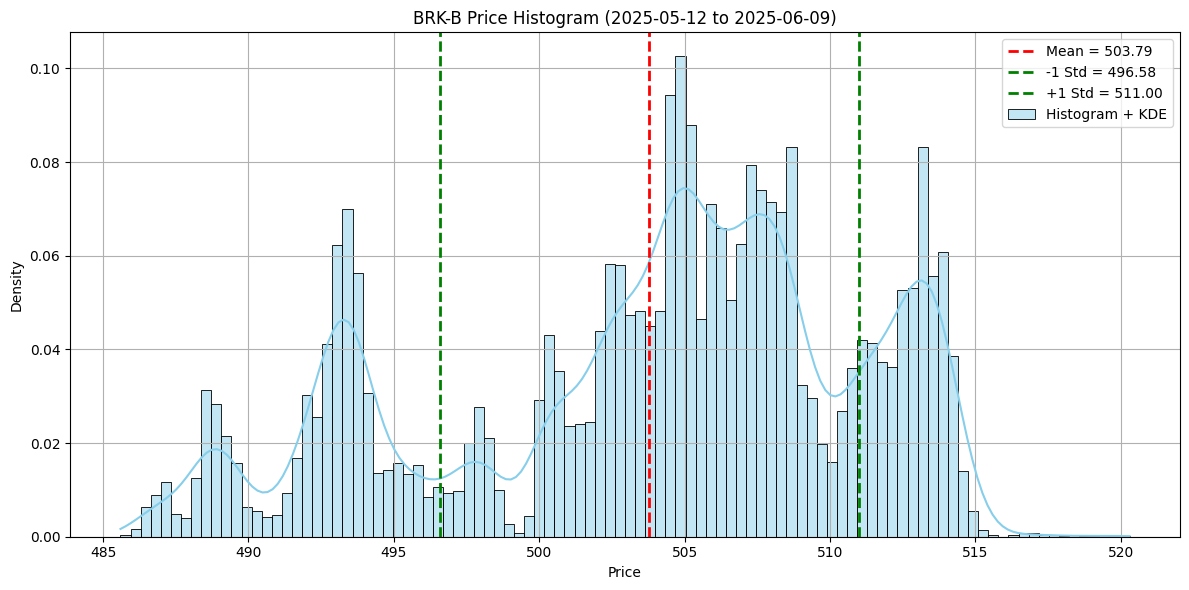

In [ ]:
start_time = prices.index.min()
end_time = prices.index.max()

# convert Unix timestamps to datetime objects
start_date = datetime.fromtimestamp(start_time).date()
end_date = datetime.fromtimestamp(end_time).date()

plot_price_histogram_with_stats(prices['price'], title=f"{symbol} Price Histogram ({start_date} to {end_date})", bins=100)